# Inleiding

De SymPy bibliotheek van Python is een krachtige tool om op een gestructureerde wijze “lastig” en “vervelend” rekenwerk te verrichten. Python inclusief SymPy is open-source beschikbaar. Je kunt deze software downloaden via Anaconda.

Om het gebruik van de SymPy bibliotheek van NumPy te demonstreren worden hier een aantal voorbeelden uitgewerkt. De onderdelen die aan de orde komen zijn:
De onderdelen die aan de orde komen zijn:

- [Voorbeeld 1](#voorbeeld_1) : het oplossen van een differentiaalvergelijking
- [Voorbeeld 2](#voorbeeld_2) : het werken met vergelijkingen
- [Voorbeeld 3](#voorbeeld_3) : het werken met vergelijkingen
- [Voorbeeld 4](#voorbeeld_4) : het direct oplossen van een differentiaalvergelijking
- [Voorbeeld 5](#voorbeeld_5) : werken  met matrices

De eerste vier voorbeelden hebben betrekking op statisch onbepaalde constructies. Verschillende oplosmethodieken worden met deze voorbeelden gedemonstreerd.

In voorbeeld 1 wordt gebruik gemaakt van de zakkingslijn voor buiging. Hiervoor worden met behulp van randvoorwaarden en overgangsvoorwaarden acht vergelijkingen opgesteld waarmee het zakkingsveld voor dit voorbeeld kan worden bepaald. 

In voorbeeld 2 en 3 wordt met behulp van de krachtenmethode op basis van hoekveranderingsvergelijkingen de krachtsverdelingen bepaald voor twee statisch onbepaalde constructies. Ook hier worden de vergelijkingen opgesteld waarmee de onbekenden kunnen worden opgelost. 

In voorbeeld 4 wordt hetzelfde probleem als in voorbeeld 1 in Python direct opgelost door gebruik te maken van de oplossingsmethodieken voor differentiaalvergelijkingen. 

In voorbeeld 5 wordt aan de hand van een voorbeeld uit de statica een stelsel vergelijkingen opgesteld dat in matrixvorm kan worden weergegeven. Voor het oplossen van de onbekenden wordt vervolgens gebruik gemaakt van de lineaire algebra technieken die in Python voorhanden zijn.



## <a id='voorbeeld_1'></a> Voorbeeld 1 : Vergelijkingen oplossen

Het voorbeeld betreft de in figuur 1 weergegeven constructie. De ligger AB wordt belast met een gelijkmatig verdeelde belasting die alleen aangrijpt aan op het liggerdeel AC. De ligger is in B volledig ingeklemd. Op de ligger werkt een gelijkmatig verdeelde belasting die alleen aangrijpt op liggerdeel AC. De oorsprong van het assenstel x-z-assenstelsel wordt in A gekozen.

<div>
<img src="Data_Het gebruik van Python bij ConstructieMechanica\Figuur 1.gif" width="500"/>
</div>

Omdat de belasting niet met één functievoorschrift voor de gehele ligger kan worden beschreven moeten de liggerdelen (velden) AC en CB afzonderlijk worden bekeken . Voor elk veld geldt de 4e orde differentiaalvergelijking voor buiging:
	 
$EI{{{{\rm{d}}^4}w} \over {{\rm{d}}{x^4}}} = q(x)$

Om de grootheden $w$, $\phi$, $M$ en $V$ in de velden AC en CB van elkaar te kunnen onderscheiden krijgen ze in veld AC een index 1 en in veld CB een index 2, dus:

- voor liggerdeel AC: $w_1$, $\phi_1$, etc.
- voor liggerdeel CB: $w_{2}$, etc.

De algemene oplossing van de 4e orde D.V. voor buiging in het geval van een gelijkmatig verdeelde belasting $q(x)=q$ is:
$$w(x) = \underbrace {{C_1} + {C_2}x + {C_3}{x^2} + {C_4}{x^3}}_{{\rm{homogene\space oplossing}}} + \underbrace {{{q{x^4}} \over {24EI}}}_{{\rm{particuliere\space oplossing}}}$$

Per liggerdeel kan het verplaatsingsveld worden opgesteld. Aangezien de gelijkmatig verdeelde belasting nul is op het liggerdeel BC is de particuliere oplossing voor dit deel van de ligger gelijk aan nul. Er geldt:

${w_{\rm{I}}}(x) = {C_1} + {C_2}x + {C_3}{x^2} + {C_4}{x^3} + {{q{x^4}} \over {24EI}}$

${w_{{\rm{2}}}}(x) = {C_5} + {C_6}x + {C_7}{x^2} + {C_8}{x^3}$
  
In totaal zijn er 8 onbekende integratieconstanten: $C_1$ t/m $C_4$ (veld AC) en $C_5$ t/m $C_8$ (veld CB). Deze zijn te berekenen met behulp van de rand- en overgangsvoorwaarden.

Ter plaatse van de randen A en B gelden (per rand) twee randvoorwaarden. Ter plaatse van de veldovergang in C moeten vier overgangsvoorwaarden worden opgesteld. De rand en overgangsvoorwaarden zijn:
- $w_1(0) = 0$
- $M_1(0) = 0$
- $w_1(a) = w_2(a)$
- $\phi_1(a) = \phi_2(a)$
- $M_1(a) = M_2(a)$
- $V_2(a) = V_2(a)$
- $w_2(L) = 0$
- $\phi)2(L) = 0$

Bij het uitwerken van de rand- en overgangsvoorwaarden wordt gebruik gemaakt van de volgende betrekkingen:

- $\phi_1(x) = - {{dw_1}\over {dx}}$
- $M_1(x) = - EI {{d^2w_1}\over {dx^2}}$
- $V_1(x) = {{dM_1}\over {dx}}$
- $\phi_2(x) = - {{dw_2}\over {dx}}$
- $M_2(x) = - EI {{d^2w_2}\over {dx^2}}$
- $V_2(x) = {{dM_2}\over {dx}}$

### Uitwerking in Python
In Python kan gewoon met symbolen worden gewerkt. Het is dus niet nodig om alle vergelijkingen eerst met de hand uit te werken. De betrekkingen uit kunnen direct worden overgenomen in Python. De genummerde tekst in het grijze kader is de in te typen tekst, daaronder is het eventuele resultaat van Python weergegeven. 

Ten eerste moet de SymPy bibliotheek worden geïmporteerd

In [1]:
import sympy as sp

Vervolgens moeten alle symbolen die gebruikt gaan worden gedefinieerd. Let op, bij de symbolen $w_1$ en $w_2$ moet aangegeven worden dat het om een functie gaat.

In [2]:
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8')
x = sp.symbols('x')

Vervolgens kunnen de variabelen worden gedeclareerd. Dit zijn voor dit voorbeeld de afmetingen $a$ en $L$, de belasting $q$ en de buigstijfheid $EI$. Let erop dat alle grootheden in dezelfde eenheden worden ingevoerd. In dit voorbeeld dus $kN$ en $m$.

In [3]:
a = 4
L = 10
q = 10
EI = 10000

Vervolgens worden de verplaatsingsfuncties voor de beide liggerdelen ingevoerd:

In [4]:
w1 = C1 + C2*x + C3*x**2 + C4*x**3 + 1/(24*EI)*q*x**4
w2 = C5 + C6*x + C7*x**2 + C8*x**3

Deze verplaatsingsfuncties kunnen ook worden gevonden door Python. Daarvoor moet eerst de differentiaalvergelijkingen worden gespecificeerd met het `sp.diff` commando. Voor de punt moet aangegeven worden welke functie gedifferentieerd moet worden en tussen haakjes de naar welke variabele en tot welke orde moet worden gedifferentieerd.

In [5]:
w1, w2 = sp.symbols('w1 w2', cls=sp.Function)
diffeq1 = sp.Eq(EI*sp.diff(w1(x), x, 4),q)
diffeq2 = sp.Eq(EI*sp.diff(w2(x), x, 4),0)

De verplaatsingsfunctie kan dan geworden worden met behulp van het commando `sp.dsolve`, waarbij beide differentiaalvergelijkingen gelijktijdig moeten worden opgelost. Vervolgens kan met het commando `.rhs` enkel het relevante rechter gedeelte van de oplossing genomen.

In [6]:
w1,w2 = sp.dsolve([diffeq1, diffeq2], [w1(x), w2(x)])
w1 = w1.rhs
w2 = w2.rhs

Voor het verwerken van de randvoorwaarden en overgangsvoorwaarden worden de betrekkingen ingevoerd.

In [7]:
phi1   = -sp.diff(  w1, x)
kappa1 =  sp.diff(phi1, x)
M1     = EI * kappa1
V1     =  sp.diff(  M1, x)
phi2   = -sp.diff(  w2, x)
kappa2 =  sp.diff(phi2, x)
M2     = EI * kappa2
V2     =  sp.diff(  M2, x)

Voor de verdere uitwerking van het probleem moeten nu de 8 vergelijkingen worden ingevoerd. In Python kunnen vergelijkingen expliciet worden vermeld. Er hoeft dus niets met de hand uitgeschreven of vereenvoudigd te worden. Je kunt zelf een naam verzinnen voor iedere vergelijking. In dit voorbeeld wordt gebruik gemaakt van de afkorting `Eq1`, `Eq2` etc.

De rand- en overgangsvoorwaarden gelden voor drie verschillende plaatsen in de ligger :

#### Randvoorwaarden in A  $(x=0)$
Bij de twee randvoorwaarden in A moet x de waarde nul krijgen. Uitwerken levert:

In [8]:
Eq1 = sp.Eq(w1.subs(x, 0) ,0)
Eq2 = sp.Eq(M1.subs(x, 0) ,0)

#### Overgangsvoorwaarden in C $( x=a )$
De vier overgangsvoorwaarden worden als volgt ingevoerd:


In [9]:
Eq3 = sp.Eq( w1.subs(x, a) ,  w2.subs(x, a))
Eq4 = sp.Eq( M1.subs(x, a) ,  M2.subs(x, a))
Eq5 = sp.Eq( V1.subs(x, a) ,  V2.subs(x, a))
Eq6 = sp.Eq(phi1.subs(x, a), phi2.subs(x, a))

#### Randvoorwaarden in B $( x=l )$
De twee randvoorwaarden in B leiden tot:

In [10]:
Eq7 = sp.Eq(w2.subs(x, L) , 0)
Eq8 = sp.Eq(phi2.subs(x, L) , 0)

Alle informatie is nu ingevoerd. De 8 vergelijkingen met 8 onbekenden moeten nu alleen nog worden opgelost. Hiervoor beschikt Python over een “solver” die wordt aangeroepen met `sp.solve`. De oplossing wordt eerst opgeslagen in een variabele waarvan de naam vrij mag worden gekozen. In dit geval wordt de naam sol gebruikt.

In [11]:
sol = sp.solve((Eq1, Eq2, Eq3, Eq4, Eq5, Eq6, Eq7, Eq8),
               ( C1 , C2,  C3,  C4,  C5,  C6,  C7,  C8))

Vervolgens wordt met het commando `.subs` de oplossing gesubstitueerd in de verplaatsingfuncties.

In [12]:
w1_sol = w1.subs(sol)
w2_sol = w2.subs(sol)

Het probleem is nu opgelost. De gevonden verplaatsingvelden kunnen netjes worden weergegeven met `display`:

In [13]:
display(w1_sol)
display(w2_sol)

x**4/24000 - 59*x**3/125000 + 41*x/3750

73*x**3/375000 - x**2/250 + 27*x/1250 - 4/375

Dit resultaat kan ook grafisch worden weergegeven. Daarvoor kunnen de (bekend veronderstelde) functies van NumPy en Matplotlib gebruikt worden. Met `sp.lambidfy` kan een SymPy uitdrukking geschreven worden als een NumPy functie.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x1_plot = np.linspace(0,  4, 40)
x2_plot = np.linspace(4, 10, 60)
w1_numpy = sp.lambdify(x, w1_sol)
w2_numpy = sp.lambdify(x, w2_sol)
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0 , color='black')
plt.xlim(0 , 10)
plt.annotate('%.4f m' % w1_numpy(4), xy = [4, w1_numpy(4)])
plt.axis('off');

Naast de zakkingslijn kan ook de $\phi$-, V- en M-lijn geplot worden

In [ ]:
phi1_sol = phi1.subs(sol)
phi2_sol = phi2.subs(sol)

phi1_numpy = sp.lambdify(x,phi1_sol)
phi2_numpy = sp.lambdify(x,phi2_sol)
phi1_plot = phi1_numpy(x1_plot)
phi2_plot = phi2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,phi1_plot)
plt.plot(x2_plot,phi2_plot)
plt.gca().invert_yaxis()
plt.title("phi-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.4f m/m' % phi1_numpy(0),xy = [0,phi1_numpy(4)])
plt.annotate('%.4f m/m' % phi2_numpy(4),xy = [4,phi2_numpy(4)])
plt.axis('off');

M1_sol = M1.subs(sol)
M2_sol = M2.subs(sol)

M1_numpy = sp.lambdify(x,M1_sol)
M2_numpy = sp.lambdify(x,M2_sol)
M1_plot = M1_numpy(x1_plot)
M2_plot = M2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,M1_plot)
plt.plot(x2_plot,M2_plot)
plt.gca().invert_yaxis()
plt.title("M-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.1f kNm' % M1_numpy(2),xy = [2,M1_numpy(2)])
plt.annotate('%.1f kNm' % M1_numpy(4),xy = [4,M1_numpy(4)])
plt.annotate('%.1f kNm' % M2_numpy(10),xy = [10,M2_numpy(10)])
plt.axis('off');

V1_sol = V1.subs(sol)
V2_sol = V2.subs(sol)

V1_numpy = sp.lambdify(x,V1_sol)
V2_numpy = sp.lambdify(x,V2_sol)
V1_plot = V1_numpy(x1_plot)
V2_plot = V2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,V1_plot)
plt.plot([4,10],[V2_plot,V2_plot])
plt.gca().invert_yaxis()
plt.title("V-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10) 
plt.annotate('%.1f kN' % V1_numpy(0),xy = [0,V1_numpy(0)])
plt.annotate('%.1f kN' % V1_numpy(4),xy = [4,V1_numpy(4)])
plt.annotate('%.1f kN' % V2_numpy(10),xy = [10,V2_numpy(10)])
plt.axis('off');

## <a id='voorbeeld_2'></a>  Voorbeeld 2 : Ongeschoord raamwerk
Het onderstaande portaal is een ongeschoord raamwerk dat zowel horizontaal als verticaal wordt belast. De buigstijfheid van de regel is $EI$, die van de kolommen is $mEI$ en $nEI$.

<div>
<img src="Data_Het gebruik van Python bij ConstructieMechanica\Figuur 2.gif" width="500"/>
</div>

Voor deze constructie zal de krachtsverdeling worden bepaald m.b.v. de methode van hoekveranderingsvergelijkingen. (zie collegedictaat CT2031 van Hartsuijker en Welleman).

Dit raamwerk is een raamwerk met verplaatsbare knopen. Als de momentvaste verbindingen in C en D door scharnieren worden vervangen met de daarbij behorende onbekende momentenparen $M_C$ en $M_D$ ontstaat een mechanisme met één vrijheidsgraad waarvoor de rotatie $\theta$ van de kolommen wordt gekozen. Deze aanpak leidt dus tot de 3 onbekenden $M_C$, $M_D$ en $\theta$.

<div>
<img src="Data_Het gebruik van Python bij ConstructieMechanica\Figuur 2a.gif" width="500"/>
</div>

Er zijn drie vergelijkingen nodig voor het bepalen van deze onbekenden :
-	twee vormveranderingsvoorwaarden in de vorm van hoekveranderingsvergelijkinen
-	één evenwichtsvergelijking in de vorm van virtuele arbeid

Het uitwerken van de hoekveranderingsvergelijkingen kan vaak m.b.v. de vergeet-mij-nietjes voor liggers op twee steunpunten. De positieve rotaties van de staafuiteinden worden in dezelfde richting gekozen als de aangenomen momenten. Het opstellen van de vergelijkingen levert zodoende:
$\eqalign{
  & (1)\quad \theta _{\rm{C}}^{{\rm{CA}}} + \theta _{\rm{C}}^{{\rm{CD}}} = 0\quad \quad  \Rightarrow \quad \left( {{{{M_{\rm{C}}}h} \over {3nEI}} - \theta } \right) + \left( {{{{M_{\rm{C}}}l} \over {3EI}} + {{\beta F{l^2}} \over {16EI}} - {{{M_{\rm{D}}}l} \over {6EI}}} \right) = 0  \cr 
  & (2)\quad \theta _{\rm{D}}^{{\rm{DC}}} + \theta _{\rm{D}}^{{\rm{DB}}} = 0\quad \quad  \Rightarrow \quad \left( { - {{{M_{\rm{C}}}l} \over {6EI}} - {{\beta F{l^2}} \over {16EI}} + {{{M_{\rm{D}}}l} \over {3EI}}} \right) + \left( {{{{M_{\rm{D}}}h} \over {3mEI}} - \theta } \right) = 0  \cr 
  & (3)\quad \delta A = 0\quad \quad \quad \;\;{\kern 1pt} \quad \; \Rightarrow \quad \alpha F \times \delta \theta  \times h - {M_{\rm{C}}} \times \delta \theta  - {M_{\rm{D}}} \times \delta \theta  = 0\quad  \Leftrightarrow \quad {M_{\rm{C}}} + {M_{\rm{D}}} = \alpha Fh \cr} $
  
De horizontale verplaatsing $u$ in $C$ is gelijk aan die in $D$ en is groot $\theta h$.
### Uitwerking in Python
De drie vergelijkingen kunnen met de hand maar bij voorkeur met Python worden opgelost.
Uitwerken met Python levert:

In [ ]:
import sympy as sp
M_C, M_D = sp.symbols('M_C M_D')
F, H, L, EI, alpha, beta, theta, m, n = sp.symbols('F H L EI alpha beta theta m n')
Eq1 = sp.Eq(M_C*H/(3*n*EI) - theta + M_C*L/(3*EI) + beta*F*L**2/(16*EI) - M_D*L/(6*EI), 0)
Eq2 = sp.Eq(- M_C*L/(6*EI) - beta*F*L**2/(16*EI) + M_D*L/(3*EI) + M_D*H/(3*m*EI) - theta,0)
Eq3 = sp.Eq(alpha*F*H - M_C - M_D, 0)
sol = sp.solve((Eq1, Eq2, Eq3), (M_C, M_D, theta))
display( sp.collect(sol[M_C]  , [alpha*F*H, beta*F*L]))
display( sp.collect(sol[M_D]  , [alpha*F*H, beta*F*L]))
display( sp.collect(sol[theta], [alpha*F*H, beta*F*L]))

De drie onbekenden zijn daarmee opgelost. Uit de bovenstaande Python uitvoer kan worden afgelezen dat hiervoor de volgende uitdrukkingen gelden:
$\eqalign{
  & {M_{\rm{C}}} = {{12mnl + 8nh} \over {8(m + n)h + 24mnl}}\alpha Fh - {{3mnl} \over {8(m + n)h + 24mnl}}\beta Fl\quad \quad \quad \;  \cr 
  & {M_{\rm{D}}} = {{12mnl + 8mh} \over {8(m + n)h + 24mnl}}\alpha Fh + {{3mnl} \over {8(m + n)h + 24mnl}}\beta Fl  \cr 
  & \theta  = {{16h(ml + nl + h) + 12mn{l^2}} \over {(8(m + n)h + 24mnl)}}{{\alpha Fh} \over {6EI}} + {{3(n - m)hl} \over {(8(m + n)h + 24mnl)}}{{\beta Fl} \over {6EI}}\quad {\rm{en}}\quad {u_{\rm{C}}} = {u_{\rm{D}}} = \theta  \times h \cr} $
 

Positieve waarden voor de hierboven gevonden momenten komen overeen met de aangenomen richtingen zoals weergegeven in het eerdere figuur.

Voor het kunnen tekenen van de M-lijn is het van belang ook het moment in $E$ te weten. Ga zelf na dat met de bekende momenten in $C$ en $D$ en de momentensom hiervoor geldt:

${M_E} = {{{M_C} - {M_D}} \over 2} + {\textstyle{1 \over 4}}\beta Fl = {{4h(n - m)} \over {8(m + n)h + 24mnl}}\alpha Fh + {{(3mnl + 2mh + 2nh)} \over {8(m + n)h + 24mnl}}\beta Fl$

De uitdrukkingen zijn gesplitst in de bijdragen van de afzonderlijke krachten $\alpha F$ en $\beta F$

### Interpretatie van de resultaten
Voor een gegeven situatie kan de M-lijn worden getekend. Belangrijk daarbij zijn de afspraken voor positieve krachtsgrootheden. Deze zijn in onderstaande weergegeven.

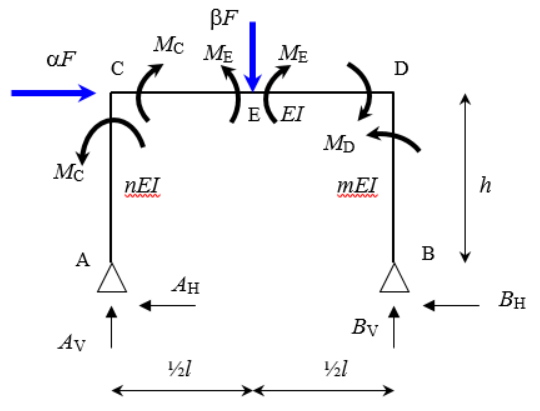

De oplegreacties kunnen nu worden bepaald:

$\eqalign{
  & {A_H} = {{{M_C}} \over h} = {{12mnl + 8nh} \over {8(m + n)h + 24mnl}}\alpha F - {{3mnl} \over {8(m + n)h + 24mnl}} \times {l \over h}\beta F  \cr 
  & {A_V} =  - {h \over l}\alpha F + {1 \over 2}\beta F  \cr 
  & {B_H} = {{{M_{\rm{D}}}} \over h} = {{12mnl + 8mh} \over {8(m + n)h + 24mnl}}\alpha F + {{3mnl} \over {8(m + n)h + 24mnl}} \times {l \over h}\beta Fl  \cr 
  & {B_V} = {h \over l}\alpha F + {1 \over 2}\beta F \cr} $
  
In het bijzondere geval dat de kolommen dezelfde buigstijfheid hebben geldt m=n en gaan de bovenstaande vergelijkingen over in:
$\eqalign{
  & {A_H} = {{{M_C}} \over h} = {1 \over 2}\alpha F - {{3nl} \over {16h + 24nl}} \times {l \over h}\beta F  \cr 
  & {A_V} =  - {h \over l}\alpha F + {1 \over 2}\beta F  \cr 
  & {B_H} = {{{M_{\rm{D}}}} \over h} = {1 \over 2}\alpha F + {{3nl} \over {16h + 24nl}} \times {l \over h}\beta Fl  \cr 
  & {B_V} = {h \over l}\alpha F + {1 \over 2}\beta F \cr} $
  
Opmerkingen:
- Hieruit blijkt dat indien een constructie met identieke kolommen alleen belast wordt met een horizontale belasting, de oplegreacties onafhankelijk zijn van de buigstijfheden van zowel de regel als de kolom. Merk op dat dit niet geldt in het algemene geval wanneer de kolommen verschillend worden uitgevoerd.
- Als de kolommen gelijke buigstijfheden hebben ($m$=$n$) blijkt het moment in $E$ onafhankelijk te zijn van de grootte van de horizontale kracht $\alpha F$. 


## <a id='voorbeeld_3'></a> Voorbeeld 3 Ongeschoord raamwerk met veren
Het onderstaande portaal is een ongeschoord raamwerk dat zowel horizontaal als verticaal wordt belast. De buigstijfheid van de regel is $EI$, die van de kolommen is $nEI$, zoals aangegeven in onderstaande figuur. De staven zijn verend met elkaar verbonden m.b.v. lineair elastische (LE) rotatieveren die een veerstijfheid $k$ hebben.

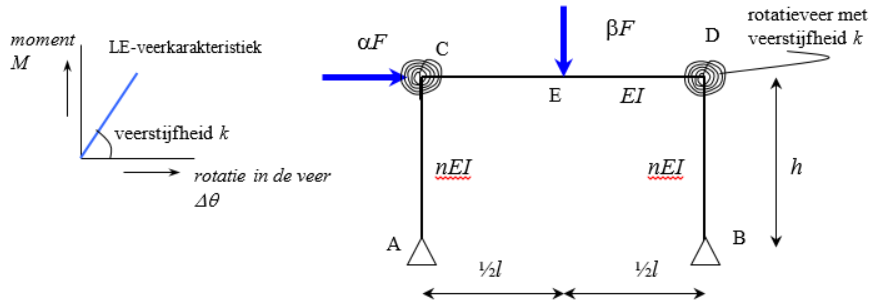

Voor deze constructie zal de krachtsverdeling worden bepaald m.b.v. de methode van hoekveranderingsvergelijkingen. (zie collegedictaat CT2031 van Hartsuijker en Welleman).

Het voorbeeld vertoont grote gelijkenis met het voorgaande voorbeeld. Nieuw element in het geheel is de verende verbinding tussen de staven. Hierdoor ontstaat een extra vervorming. Dit is de hoekverdraaiing in de rotatieveer. Deze vervorming wordt aangeduid met $\Delta \theta$. Uiteraard is deze vervorming  recht-evenredig met het moment in de veer aangezien een LE-veerkarakteristiek wordt aangenomen. Ook nu leidt deze aanpak dus tot de 3 onbekenden $M_C$, $M_D$ en $\theta$, zie onderstaande figuur					

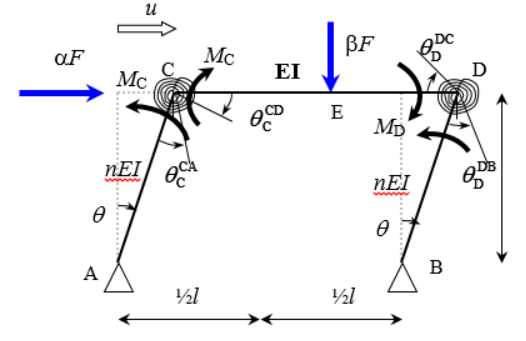
De drie benodigde vergelijkingen zijn voor het oplossen van de onbekenden zijn:
-	twee vormveranderingsvoorwaarden in de vorm van hoekveranderingsvergelijkinen
-	één evenwichtsvergelijking in de vorm van virtuele arbeid

De positieve rotaties van de staafuiteinden worden in dezelfde richting gekozen als de aangenomen momenten. Het opstellen van de vergelijkingen levert zodoende:

$\eqalign{
  & (1)\quad \theta _{\rm{C}}^{{\rm{CA}}} + \theta _{\rm{C}}^{{\rm{CD}}} + \Delta {\theta _{\rm{C}}} = 0\quad \quad  \Rightarrow \quad \left( {{{{M_{\rm{C}}}h} \over {3nEI}} - \theta } \right) + \left( {{{{M_{\rm{C}}}l} \over {3EI}} + {{\beta F{l^2}} \over {16EI}} - {{{M_{\rm{D}}}l} \over {6EI}}} \right) + {{{M_{\rm{C}}}} \over k} = 0  \cr 
  & (2)\quad \theta _{\rm{D}}^{{\rm{DC}}} + \theta _{\rm{D}}^{{\rm{DB}}} + \Delta {\theta _{\rm{D}}} = 0\quad \quad  \Rightarrow \quad \left( { - {{{M_{\rm{C}}}l} \over {6EI}} - {{\beta F{l^2}} \over {16EI}} + {{{M_{\rm{D}}}l} \over {3EI}}} \right) + \left( {{{{M_{\rm{D}}}h} \over {3nEI}} - \theta } \right) + {{{M_{\rm{D}}}} \over k} = 0  \cr 
  & (3)\quad \delta A = 0\quad \quad \quad \;\;{\kern 1pt} \quad \; \Rightarrow \quad \alpha F \times \delta \theta  \times h - {M_{\rm{C}}} \times \delta \theta  - {M_{\rm{D}}} \times \delta \theta  = 0\quad  \Leftrightarrow \quad {M_{\rm{C}}} + {M_{\rm{D}}} = \alpha Fh \cr} $
  
De horizontale verplaatsing $u$ in $C$ is gelijk aan die in $D$ en is groot $\theta h$.

### Uitwerking in Python
De drie vergelijkingen kunnen met de hand maar bij voorkeur met Python worden opgelost. 

Op een handige manier uitwerken met Python levert:


In [ ]:
import sympy as sp
M_C, M_D = sp.symbols('M_C M_D')
F, K, H, L, EI, alpha, beta, theta, m, n, u = sp.symbols('F K H L EI alpha beta theta m n u')
Eq1 = sp.Eq(M_C*H/(3*n*EI) - theta +M_C*L/(3*EI) + beta*F*L**2/(16*EI) - M_D*L/(6*EI) + M_C/K, 0)
Eq2 = sp.Eq(- M_C*L/(6*EI) - beta*F*L**2/(16*EI) + M_D*L/(3*EI) + M_D*H/(3*n*EI) - theta + M_D/K, 0)
Eq3 = sp.Eq(alpha*F*H - M_C -M_D , 0)
sol = sp.solve((Eq1 , Eq2 , Eq3), (M_C , M_D , theta))
display(sp.collect(sol[M_C]  , alpha*F*H))
display(sp.collect(sol[M_D]  , alpha*F*H))
display(sp.collect(sol[theta], alpha*F*H))
u = sol[theta]*H
display(u)

De drie onbekenden zijn daarmee opgelost en tevens al gesplitst in de diverse aandelen. Uit de bovenstaande afbeelding kunnen, door hergroeperen, de onderstaande uitdrukkingen worden verkregen:

$\eqalign{
  & {M_{\rm{C}}} = {1 \over 2}\alpha Fh - {1 \over {3 + 2{h \over {nl}} + {{6EI} \over {kl}}}}{3 \over 8}Fl  \cr 
  & {M_{\rm{D}}} = {1 \over 2}\alpha Fh + {1 \over {3 + 2{h \over {nl}} + {{6EI} \over {kl}}}}{3 \over 8}Fl  \cr 
  & \theta  = \left( {{h \over {6nEI}} + {l \over {12EI}} + {1 \over {2k}}} \right)\alpha Fh\quad {\rm{en}}\quad {u_{\rm{C}}} = {u_{\rm{D}}} = \theta  \times h = {1 \over 2}\alpha F{h^2}\left( {{h \over {3nEI}} + {l \over {6EI}} + {1 \over k}} \right) \cr} $
  
Positieve waarden komen overeen met de richtingen die werden aangenomen.  

De oplegreacties kunnen op dezelfde wijze als in het voorgaande voorbeeld worden bepaald.

### Interpretatie van de resultaten
De horizontale verplaatsing van de bovenregel blijkt onafhankelijk te zijn van de grootte van de verticale belasting. Dit was in het vorige voorbeeld ook het geval voor de bijzondere situatie dat beide kolommen gelijk worden uitgevoerd en dat geldt dus ook in dit geval.

Als de uitdrukking voor de horizontale verplaatsing beter bekeken wordt zijn daar drie afzonderlijke aandelen in te herkennen:
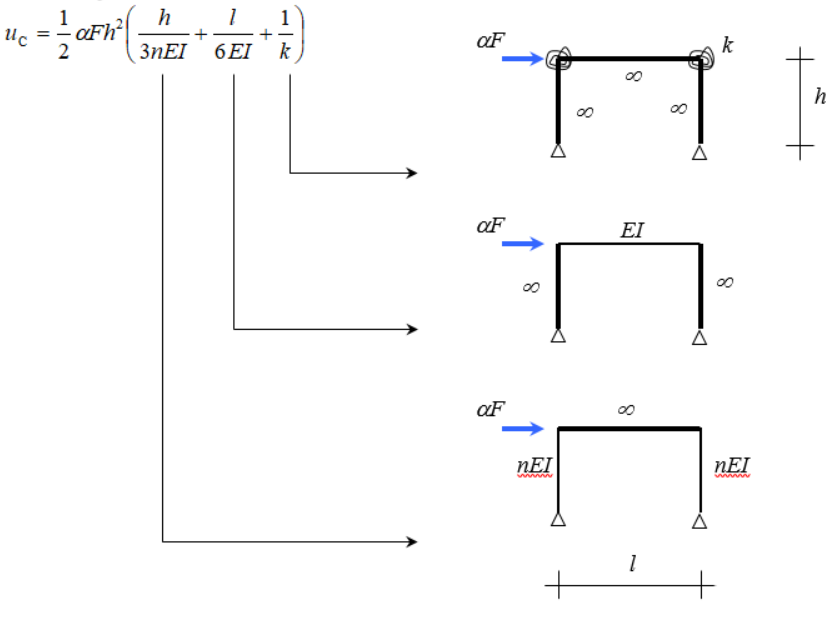

## <a id='voorbeeld_4'></a>  Voorbeeld 4 : het direct oplossen van een differentiaalvergelijking
In Python is het ook mogelijk differentiaalvergelijkingen direct op te lossen. Met behulp van het voorbeeld 1 zal dit worden gedemonstreerd. Het betreft hier de 4e orde D.V. voor buiging waarvoor geldt:

$EI{{{{\rm{d}}^4}w} \over {{\rm{d}}{x^4}}} =  - q(x)$

De ligger $AB$ wordt belast met een gelijkmatig verdeelde belasting die alleen aangrijpt op het liggerdeel $AC$. De ligger is in B volledig ingeklemd. Op de ligger werkt een gelijkmatig verdeelde belasting die alleen aangrijpt op liggerdeel $AC$. De oorsprong van het assenstel x-z-assenstelsel wordt in $A$ gekozen.

<div>
<img src="Data_Het gebruik van Python bij ConstructieMechanica\Figuur 1.gif" width="500"/>
</div>

In voorbeeld 1 werd deze constructie opgesplitst in twee delen aangezien de belasting niet met één functievoorschrift voor de gehele ligger kan worden beschreven en werd de met de hand bepaalde algemene oplossing van de DV gebruikt. Deze stappen kunnen echter ook direct met Python worden uitgevoerd. Door de belasting met een stapfunctie (Heaviside functie) in te voeren is het mogelijk deze met één functievoorschrift voor het liggerdeel $AB$ in Python te beschrijven.

In [ ]:
import sympy as sp
w = sp.symbols('w', cls=sp.Function)
x = sp.symbols('x')
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4') 
Q  = 10
L  = 10
EI = 10000
q = Q*(1 - sp.Heaviside(x - 4))
sp.plot(q , (x , 0 , 10));

De belastingsfunctie is geplot met behulp van de SymPy plotfuncties omdat de overdracht naar een NumPy functie niet goed werkt met Heaviside en/of Diracdelta functies.
Naast de D.V. moeten uiteraard ook geldige randvoorwaarden worden gespecificeerd. 

- Voor de oplegging in A geldt  : $w(0)=0$ en $M(0)=0$
- Voor de inklemming in B geldt : $w(L)=0$ en $\phi(0)=0$

Met het invoeren van de D.V. en het aangeven van de r.v.w. kan Python de oplossing direct bepalen met behulp van het commando 1 `sp.dsolve`. In dit commando is de set `ics` de randvoorwaarden.

In [ ]:
diffeq = sp.Eq(EI*sp.diff(w(x) , x , 4) , q)
w = sp.dsolve(diffeq , w(x) , 
              ics={w(0): 0 ,
                   w(L): 0 ,
                   w(x).diff(x , 2).subs(x , 0) : 0 ,
                   w(x).diff(x , 1).subs(x , L) : 0})
w_sol = w.rhs

Het zakkingsveld is nu bepaald. In de uitdrukking voor de zakking komen ook weer termen voor met heaviside-functies waardoor het niet zinvol is deze hier af te beelden. Uiteraard is een plot van deze functie wel zinvol. Op basis van het gevonden verplaatsingsveld kunnen ook de M- en V-lijnen worden weergegeven. De gevonden blauwe zakkingslijn komt overeen met de eerder bepaalde oplossing van voorbeeld 1.

In [ ]:
sp.plotting.plot(w_sol , (x , 0 , 10))
phi = -sp.diff(w_sol , x)
kappa = sp.diff(phi , x)
M = EI * kappa
V = sp.diff(M , x)
sp.plotting.plot(M , (x , 0 , 10));
sp.plotting.plot(V , (x , 0 , 10));

Naast de stapfunctie die hier gebruikt is voor een gelijkmatig verdeelde belasting die op een deel van de ligger aangrijpt kan er ook gebruik worden gemaakt van een Dirac functie om een puntlast in te voeren. Werk dit zelf maar eens uit.


Opmerkingen direct oplossen differentiaalvergelijking:
- De `lambdify` functie heeft moeite met het omschrijven van de de vergelijkingen naar een numpy functie in het geval van de geïntegreerde diracdelta functie. Dit kan worden opgelost door de getalswaardes te evalueren binnen SymPy met `sp.N`.
- Ook werkt de invoer van randvoorwaarden voor complexe gevallen niet altijd. De eerder aangereikte methode waarbij eerst de algemene verplaatsingsfunctie wordt opgesteld heeft daarom de voorkeur. 

## <a id='voorbeeld_5'></a>  Voorbeeld 5 : Werken met matrices
Het laatste voorbeeld betreft het evenwicht van een star blok zoals in deel 1 van Hartsuijker op pagina 89 wordt beschreven.

De kubus met riblengte $a$ en gewicht $G$ wordt in evenwicht gehouden door zes krachten $F_1$ t/m $F_6$. Gegeven is dat voor de hoek $\alpha$ tussen de werklijnen van de krachten geldt: $\tan(\alpha)=3/4$
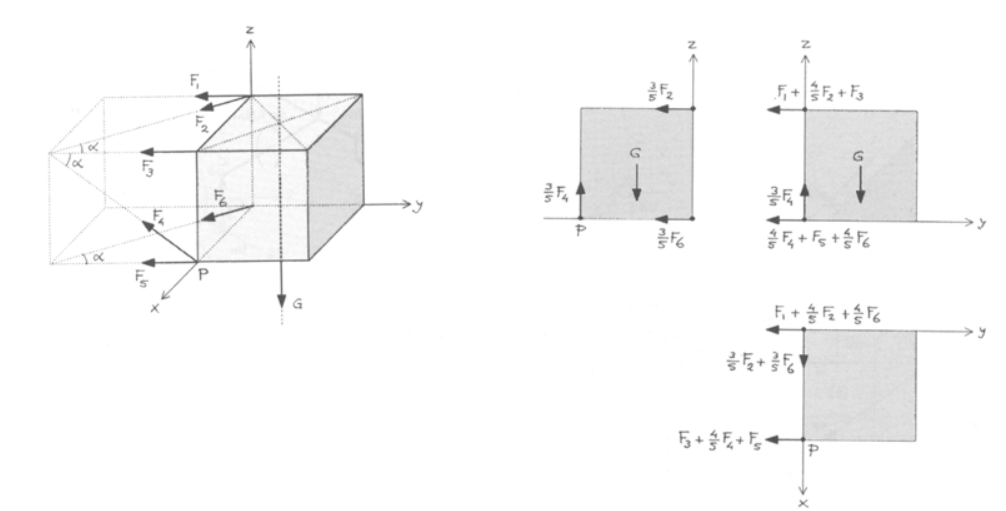

De evenwichtsvergelijkingen die voor dit probleem kunnen worden opgesteld zijn:

$\eqalign{
  & \sum {{F_x}}  = {\textstyle{3 \over 5}}{F_2} + {\textstyle{3 \over 5}}{F_6} = 0  \cr 
  & \sum {{F_y}}  = {F_1} + {\textstyle{4 \over 5}}{F_2} + {F_3} + {\textstyle{4 \over 5}}{F_4} + {F_5} + {\textstyle{4 \over 5}}{F_6} = 0  \cr 
  & \sum {{F_z}}  = {\textstyle{3 \over 5}}{F_4} - G = 0  \cr 
  & \sum {{T_x}}  = \left( {{F_1} + {\textstyle{4 \over 5}}{F_2} + {F_3}} \right) \times a - G \times {\textstyle{1 \over 2}}a = 0  \cr 
  & \sum {{T_y}}  = {\textstyle{3 \over 5}}{F_2} \times a - {\textstyle{3 \over 5}}{F_4} \times a + G \times {\textstyle{1 \over 2}}a = 0  \cr 
  & \sum {{T_z}}  =  - \left( {{F_3} + {\textstyle{4 \over 5}}{F_4} + {F_5}} \right) \times a = 0 \cr} $
  
 Dit stelsel vergelijkingen kan in matrix-vorm worden weergegeven:

$\left[ {\matrix{
   0 & {{\textstyle{3 \over 5}}} & 0 & 0 & 0 & {{\textstyle{3 \over 5}}}  \cr 
   1 & {{\textstyle{4 \over 5}}} & 1 & {{\textstyle{4 \over 5}}} & 1 & {{\textstyle{4 \over 5}}}  \cr 
   0 & 0 & 0 & {{\textstyle{3 \over 5}}} & 0 & 0  \cr 
   a & {{\textstyle{4 \over 5}}a} & a & 0 & 0 & 0  \cr 
   0 & {{\textstyle{3 \over 5}}a} & 0 & { - {\textstyle{3 \over 5}}a} & 0 & 0  \cr 
   0 & 0 & { - a} & { - {\textstyle{4 \over 5}}a} & a & 0  \cr 
 } } \right] \times \left[ {\matrix{
   {{F_1}}  \cr 
   {{F_2}}  \cr 
   {{F_3}}  \cr 
   {{F_4}}  \cr 
   {{F_5}}  \cr 
   {{F_6}}  \cr 
 } } \right] = \left[ {\matrix{
   0  \cr 
   0  \cr 
   G  \cr 
   {{\textstyle{1 \over 2}}Ga}  \cr 
   { - {\textstyle{1 \over 2}}Ga}  \cr 
   0  \cr 
 } } \right]$
 
De vector met onbekenden wordt gevormd door de krachten $F_i$ . Dit stelsel kan formeel geschreven worden als:

$\left[ A \right] \left\{ x \right\} = \left\{ b \right\}$


### Uitwerking in SymPy
Je kan symbolisch het antwoord bepalen met behulp van SymPy. Dat kan zoals eerder gedaan door een aantal vergelijkingen op te stellen en op te lossen met `sp.solve`, of je stelt een augmented matrix op en lost deze op met `sp.linsolve`. Dat tweede is hieronder voorgedaan. Daarvoor moeten eerst de symbolen worden gespecificeerd.

In [ ]:
G, a = sp.symbols("G a")
F1, F2, F3, F4, F5, F6 = sp.symbols("F1 F2 F3 F4 F5 F6")

Vervolgens kunnen de matrices worden opgesteld. De `sp.nsimplify` zorgt ervoor dat de waardes in de matrices worden gezien als rationele getallen. Met `.row_join` worden de matrices in rijrichting aan elkaar geplakt.

In [ ]:
A = sp.nsimplify(sp.Matrix([[0 , 3/5   , 0  , 0      , 0  , 3/5 ] ,
              [1 , 4/5   , 1  , 4/5    , 1  , 4/5 ] ,
              [0 , 0     , 0  , 3/5    , 0  , 0   ] ,
              [a , 4/5*a , a  , 0      , 0  , 0   ] ,
              [0 , 3/5*a , 0  , -3/5*a , 0  , 0   ] ,
              [0 , 0     , -a , -4/5*a , -a , 0   ]]))
b = sp.Matrix([0 , 0 , G , G*a/2 , -G*a/2 , 0])
display(A)
display(b)

Het oplossen van de vector met de zes krachten als onbekende gaat nu als volgt met het commando `sp.linsolve`:

In [ ]:
system = A.row_join(b)
sol = sp.linsolve(system)
display(sol)

Het numerieke resultaat kan worden gevonden door G te substituëren. Merk op dat we nu een exact antwoord krijgen zonder numerieke fouten.

In [ ]:
display(sol.subs(G,24))

### Uitwerking in Python
Voor het werken met matrices kan ook worden gewerkt met de NumPy bibliotheek als je de niet-symbolische uitkomst wilt. Alleereerst moet deze geïmporteerd worden en moeten bekende waardes worden gespecificeerd:

In [ ]:
import numpy as np
G = 24
a = 1

Vervolgens kunnen de matrix en de vector met bekenden worden ingevoerd. Je mag zelf een naam geven aan zowel de matrix als de vector met bekenden. In dit voorbeeld wordt de matrix $A$ en de vector $b$ genoemd. De invoer moet zorgvuldig gebeuren dus let op de syntax :

In [ ]:
A = np.array([[0 , 3/5   , 0  , 0      , 0  , 3/5 ] ,
              [1 , 4/5   , 1  , 4/5    , 1  , 4/5 ] ,
              [0 , 0     , 0  , 3/5    , 0  , 0   ] ,
              [a , 4/5*a , a  , 0      , 0  , 0   ] ,
              [0 , 3/5*a , 0  , -3/5*a , 0  , 0   ] ,
              [0 , 0     , -a , -4/5*a , -a , 0   ]])
b = np.array([0 , 0 , G , 0.5*G*a , -0.5*G*a , 0])
print(A)
print(b)

Het oplossen van de vector met onbekenden, de zes krachten gaat als volgt met het commando `np.linalg.solve`. Merk op dat we nu geen exact antwoord krijgen.

In [ ]:
x = np.linalg.solve(A , b)
print(x)